In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os

# Preprocessing pipeline



## First Function

In [18]:
# Directory containing QR code images
directory = "test cases"
output_directory = "gray_images"  # Directory to store processed images
test_cases = ["01-Getting-started.png", "02-Matsawar-3edel-ya3am.png","03-Leffy-bina-ya-donya.png", "04-Black-mirror.png",
              "10-Gone-With-The-Wind.png", "07-THE-MIGHTY-FINGER.png","13-2el-noor-2ata3.png","15.png","14-BANANAAA!!!.png"]



# Function to check and correct image inversion
def check_and_correct_inversion(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the mean pixel intensity
    mean_intensity = np.mean(gray)
    
    # Check if the image is likely inverted based on mean intensity
    if 3 < mean_intensity < 127:  # Adjust threshold as needed
        print("Image is likely inverted. Inverting...")
        image = cv2.bitwise_not(image)
    
    return image




# Function to load and preprocess images
def convert_grayscale():
    for filename in test_cases:
        if filename.endswith(".png") or filename.endswith(".jpg"):
            # Load image
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            
            # Check and correct image inversion
            img = check_and_correct_inversion(img)
           
            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
         
            # Save processed image
            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, gray_img)
            
            # Plot original and thresholded images (optional)
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(gray_img, cmap='gray')
            plt.title("Output Image")
            plt.axis('off')
            
            plt.tight_layout()
            plt.show()


# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Call the preprocessing function
convert_grayscale()


## Second Function

In [19]:
def get_contours(images):
  processed_images = []
  for image in images:
      # Initialize list to store squares and their dimensions
      squares_with_dimensions = []

      # Find contours in the image
      contours, _ = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

      # Assuming contours are already defined
      for cnt in contours:
          x1, y1 = cnt[0][0]
          approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
          if len(approx) == 4:
              x, y, w, h = cv2.boundingRect(cnt)
              ratio = float(w) / h
              if ratio >= 0.9 and ratio <= 1.1:
                  squares_with_dimensions.append((cnt, (x1, y1), w, h))

      # Sort squares by area in descending order
      squares_with_dimensions.sort(key=lambda x: cv2.contourArea(x[0]), reverse=True)

      # Find the largest group of three squares with the same dimensions within a tolerance of ±5 pixels
      largest_same_dim_squares = []
      i = 0
      while i < len(squares_with_dimensions) - 2:
          square_i = squares_with_dimensions[i]
          square_i1 = squares_with_dimensions[i + 1]
          square_i2 = squares_with_dimensions[i + 2]
          w_i, h_i = square_i[2:]
          w_i1, h_i1 = square_i1[2:]
          w_i2, h_i2 = square_i2[2:]
          if (abs(w_i - w_i1) <= 5 and abs(h_i - h_i1) <= 5) and (abs(w_i - w_i2) <= 5 and abs(h_i - h_i2) <= 5):
              largest_same_dim_squares.append((square_i, square_i1, square_i2))
              break
          i += 1

      # Draw the contours and add text for square objects
      for squares in largest_same_dim_squares:
          for square_info in squares:
              cnt, (x1, y1), _, _ = square_info
              cv2.drawContours(image, [cnt], -1, (128, 128, 128), 3)
              cv2.putText(image, "Square", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (128, 128, 128), 2)

      # Get centers of squares
      square_centers = [[np.mean(square[0], axis=0)[0] for square in squares] for squares in largest_same_dim_squares]

      # Draw lines between the centers of adjacent squares
      for squares in square_centers:
          for i in range(len(squares) - 1):
              center_i = squares[i]
              center_j = squares[i + 1]
              cv2.line(image, (int(center_i[0]), int(center_i[1])), (int(center_j[0]), int(center_j[1])), (0, 255, 0), 2)

      processed_images.append(image)

      return processed_images

## Preprocessing Pipeline

In [20]:
# Define the preprocessing pipeline
def preprocessing_pipeline(images):
    grayscale_images = convert_to_grayscale(images)
    contoured_images = get_contours(grayscale_images)

    return contoured_images

## Defining Test Cases

In [21]:
# Define your test cases
test_cases = [cv2.imread("01-Getting-started.png"),
              cv2.imread("02-Matsawar-3edel-ya3am.png"),
              cv2.imread("03-Leffy-bina-ya-donya.png"),
              cv2.imread("04-Black-mirror.png"),
              cv2.imread("05-Caesar-cipher.png"),
              cv2.imread("06-Railfence-cipher.png"),
              cv2.imread("07-THE-MIGHTY-FINGER.png"),
              cv2.imread("08-Compresso-Espresso.png"),
              cv2.imread("09-My-phone-fell-while-taking-this-one-...-or-did-it.png"),
              cv2.imread("10-Gone-With-The-Wind.png"),
              cv2.imread("11-weewooweewooweewoo.png"),
              cv2.imread("12-mal7-w-felfel.png"),
              cv2.imread("13-2el-noor-2ata3.png"),
              cv2.imread("14-BANANAAA!!!.png"),
              cv2.imread("15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg"),
              cv2.imread("16-V3-QR-Code...-can-you-do-it.png"),
              ]

## Applying Preprocessing Pipeline to all Test Cases

In [22]:
preprocessed_images = [preprocessing_pipeline(test_case) for test_case in test_cases]

## Displaying Output

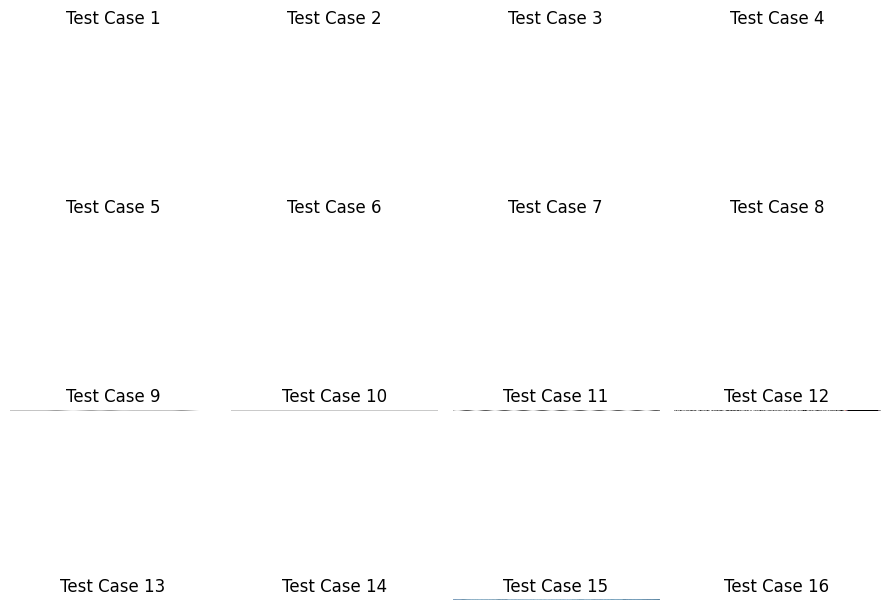

In [23]:
# Set up the figure and axes
num_test_cases = len(test_cases)
num_cols = 4
num_rows = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 9))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Display the images
for i, (test_case, preprocessed_image) in enumerate(zip(test_cases, preprocessed_images)):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].imshow(preprocessed_image, cmap='gray')
    axs[row_idx, col_idx].set_title(f'Test Case {i+1}')
    axs[row_idx, col_idx].axis('off')

# Hide any extra empty subplots
for i in range(num_test_cases, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].axis('off')

# Show the plot
plt.tight_layout()
plt.show()